In [268]:
import pandas as pd
import datetime

%matplotlib inline 

Q1. Using all the historical closing prices of MSFT shares calculate which **60** day period yielded the best return on investment. 

Return on investment: 

    (sold_price – purchase_price) / purchase_price
    
    For example, if you buy 20 shares of Joe's Pizza for $10 a share, your investment cost is $200. 
    If you sell those shares for $250, then your ROI is ($250-200)/$200 for a total of 0.25 or 25%. 

In [269]:
stock = pd.read_csv('msft.csv', parse_dates=['Date']).set_index('Date').sort()
stock.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1986-03-13,25.49952,29.24928,25.49952,27.99936,1031788800,0.06918
1986-03-14,27.99936,29.49984,27.99936,28.99872,308160000,0.07165
1986-03-17,28.99872,29.75040,28.99872,29.49984,133171200,0.07289
1986-03-18,29.49984,29.75040,28.50048,28.75104,67766400,0.07104
1986-03-19,28.75104,28.99872,27.99936,28.24992,47894400,0.06980


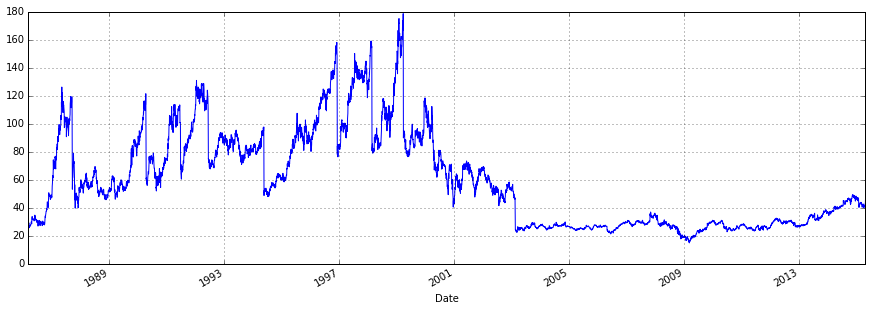

In [270]:
stock["Open"].plot(figsize=(15, 5));

In [271]:
def ROI(series):
    """Return on investiment"""
    return (series[-1] - series[0]) / series[0]

In [272]:
days = 10 

stock["ROI"] = pd.rolling_apply(stock["Close"], days, ROI, center=False)

(62.000640000000004, 78.999830000000003, 16.999189999999999)

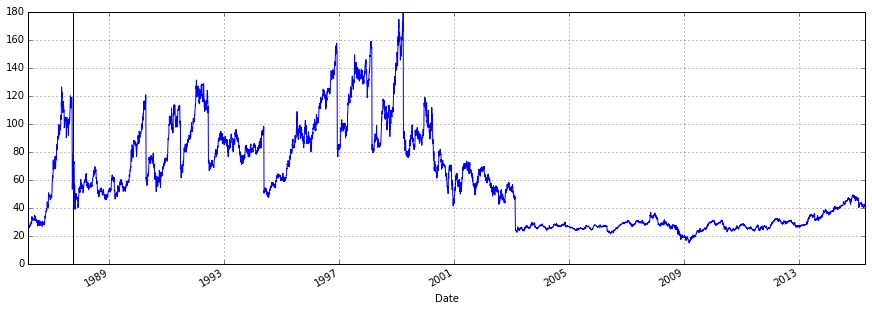

In [273]:
sell_date = stock.ROI.argmax()

ax = stock["Close"].plot(figsize=(15, 5));

ax.axvspan(sell_date - datetime.timedelta(days=days), sell_date, facecolor='green')

period = stock["Close"][sell_date - datetime.timedelta(days=days):sell_date]

period[0], period[-1], period[-1] - period[0]